Total variance explained by first two components: 99.81%


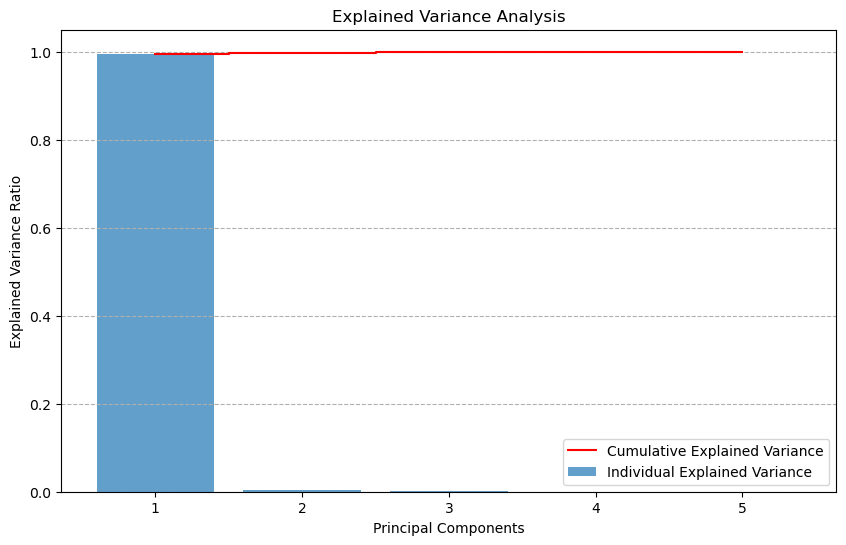

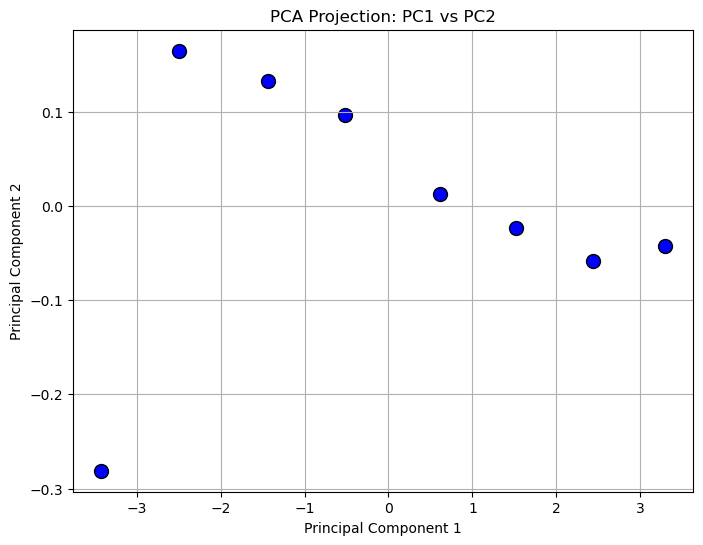

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
df = pd.read_csv('/home/nmit/Pictures/Medical_report.csv')

# 2. Standardize the features (Mean=0, Variance=1)
# Standardizing is crucial for PCA as it is sensitive to the scale of features.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# 4. Analyze Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]
df_pca = pd.DataFrame(data=pca_data, columns=pca_columns)

# Save the transformed data
df_pca.to_csv('PCA_transformed_medical_data.csv', index=False)

# 5. Visualizing the results
# Explained Variance Plot (Scree Plot)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Analysis')
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--')
plt.savefig('explained_variance_plot.png')

# Scatter plot of first two components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], color='blue', edgecolor='k', s=100)
plt.title('PCA Projection: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('pca_scatter_plot.png')

# Summary Output
print(f"Total variance explained by first two components: {cumulative_variance[1]*100:.2f}%")



